# load in and visualize the data

In [1]:
#import the necessary packages
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats

In [2]:
#reading in the training data set from Kaggle
train_data = pd.read_csv("https://storage.googleapis.com/kaggle-competitions-data/kaggle/5407/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1519509924&Signature=HHJ3920xNPex63AYF8ujgBI2SuWascdKjwYUOW94KEvoAsidWat4B9BzpYvLMeXMqtHh%2FHYoIDAP4pI8guDeNgwR49YmegUFGfqyl8j7DuJNLrTDq3IOjF%2BXWzWSmDHaTQUyW9YdkCFd4S4xnZkDPGGh9btvCPK4b1D8Zt0K%2BynM%2FZmVC%2FuBYa3FRm1Ce91YfvA5ulh6rHCHSXXQob%2FEI1f%2Fc3euGiLuZJr5UWSmekzSL42DvUhuA7qCmIB5lg8eWt02Sb5aF7iwU2134PkByTNGe2963gj9z25%2BQinnoQXCwATdi4sXHTetNOVi4FUaOv0un6TaXZtc1OKMe0q%2Buw%3D%3D")

In [3]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
#Pulling up a header to get an understanding of the data set
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#printing all columns so I can see which features are included in the information
print(train_data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
#We need to drop the Id column because it is not needed in the analysis
train_data.drop(['Id'], inplace=True, axis=1)

# Look for outliers

now that my data is clean I will look for outliers.

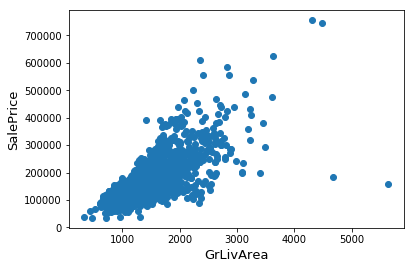

In [7]:
#finding outliers by comparing SalePrice and GrLivArea
fig, ax = plt.subplots()
ax.scatter(x = train_data['GrLivArea'], y = train_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

I can see two outliers where homes sold for relatively cheap for the house size.

In [8]:
#dropping those two variables
train_data = train_data.drop(train_data[(train_data['GrLivArea']>4000) & (train_data['SalePrice']<300000)].index)

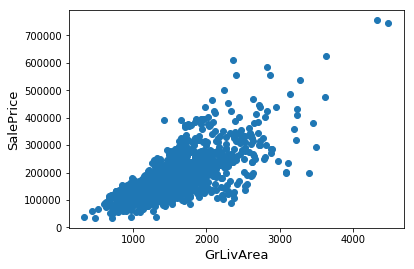

In [9]:
#checking to see if the outliers were dropped
fig, ax = plt.subplots()
ax.scatter(x = train_data['GrLivArea'], y = train_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

# Analyzing SalePrice (the feature we want to predict)

In [10]:
train_data['SalePrice'].describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

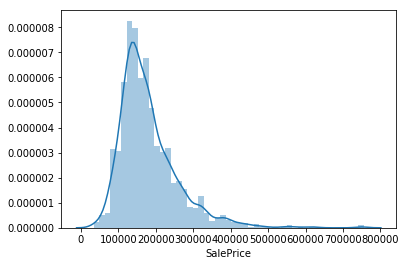

In [11]:
#graph to analyze the distribution
sns.distplot(train_data['SalePrice'])

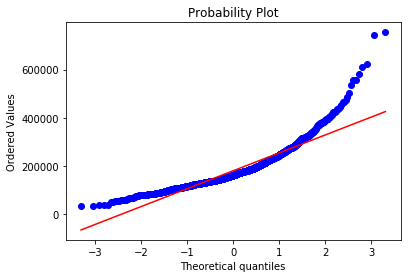

In [12]:
#Another figure to help represent linearilty 
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)
plt.show()

From the descriptive stats and the graphs above we can see that Sale Price is not perfect. If we take the log of SalePrice we can normalize the variable. 

# data cleaning

First I will find which features having missing values

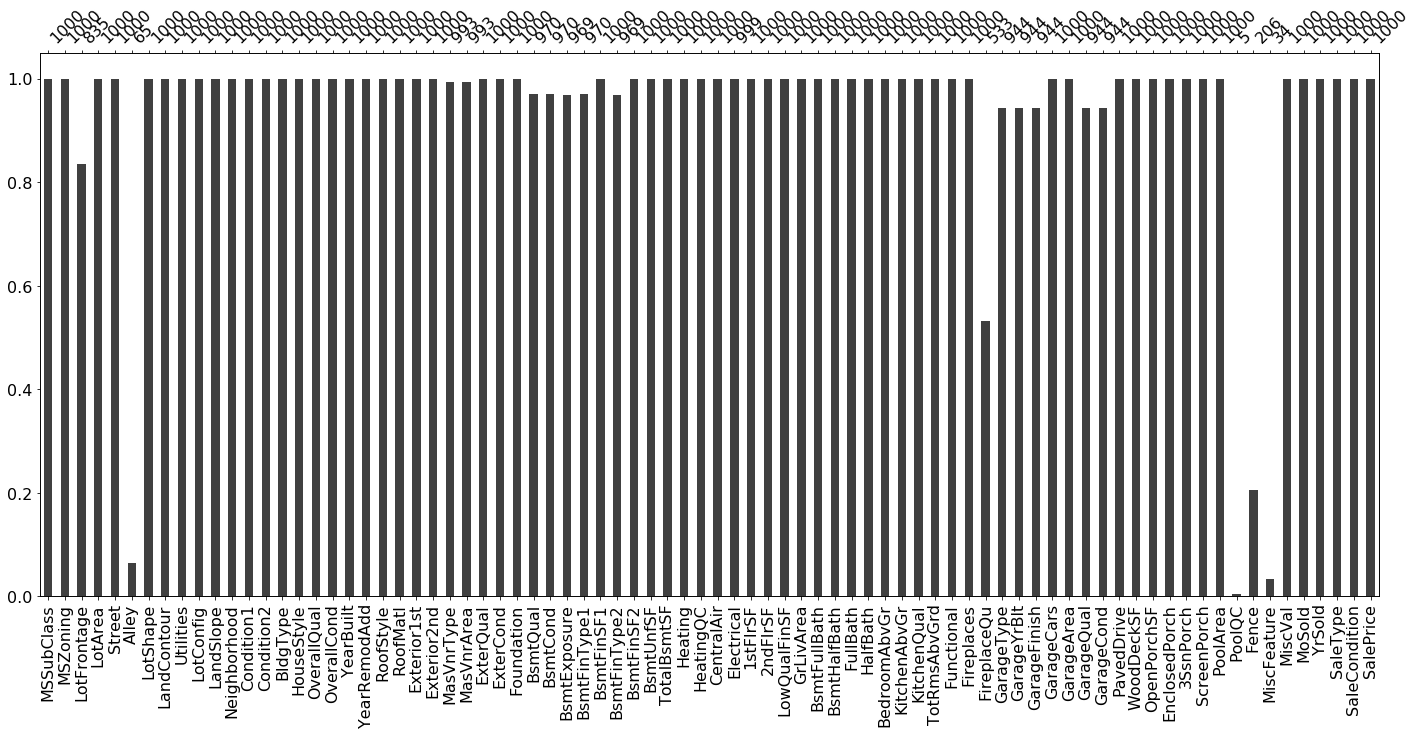

In [15]:
#finding which features have missing data
import missingno as msno
msno.bar(train_data.sample(1000))

In [16]:
#how many observations are missing in each feature
def show_missing():
    missing = train_data.columns[train_data.isnull().any()].tolist()
    return missing
train_data[show_missing()].isnull().sum()

LotFrontage      259
Alley           1367
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1452
Fence           1177
MiscFeature     1404
dtype: int64

Now that I know which features are missing data I will decide if all features are relevant or if by dropping variables I can save myself time as well as improve my predicitive power.

In [17]:
#I will drop PoolQC  because 1453 observations are missing out of 1460
train_data.drop(['PoolQC'], axis=1, inplace=True)
#I will drop MiscFeatures for the same reason as PoolQC
train_data.drop(['MiscFeature'], axis=1, inplace=True)
#I will drop YrSold because the year sold won't effect SalePrice
train_data.drop(['YrSold'], axis=1, inplace=True)
#I will drop Utilities because all observations are same minus two observations
train_data.drop(['Utilities'], axis=1, inplace=True)
#there are also variables within the set that seem redundant, these features will be dropped as well
train_data.drop(['ExterQual', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtFinSF1', 'GarageQual', 'Condition2', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Heating', 'HouseStyle', 'RoofMatl'], axis=1, inplace=True)

Next I will go through the data with missing values and replace all "NaN' with the best value

step 1) value counts

step 2) determine how to fill in missing value

Note* all assumptions for dropping and filling data can be found in the data description

In [18]:
#Function to find value counts
def cat_exploration(column):
    return train_data[column].value_counts()

In [19]:
#function to fill in for NaN values
def cat_imputation(column, value):
    train_data.loc[train_data[column].isnull(),column] = value

In [20]:
#I will fill LotFrontage with the mean. Find mean
train_data["LotFrontage"].mean()

69.79733110925771

In [21]:
#fill in missing values in LotFrontage with the mean
train_data = train_data.fillna({"LotFrontage": 70})

In [22]:
#understanding the variable Alley
cat_exploration('Alley')

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [23]:
#NaN means no alley so I will fill with "none"
cat_imputation('Alley','None')

In [24]:
#understanding these two variables
train_data[['MasVnrType','MasVnrArea']][train_data['MasVnrType'].isnull()==True]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [25]:
#finding what information is in this feature
cat_exploration('MasVnrType')

None       864
BrkFace    445
Stone      126
BrkCmn      15
Name: MasVnrType, dtype: int64

In [26]:
#NaN in MasVnrType means no and NaN in MasVnrArea means 0
cat_imputation('MasVnrType', 'None')
cat_imputation('MasVnrArea', 0.0)

In [27]:
#understanding these 3 features of basement
basement_cols=['BsmtQual','BsmtCond','BsmtExposure']
train_data[basement_cols][train_data['BsmtQual'].isnull()==True]

,BsmtQual,BsmtCond,BsmtExposure
17,NaN,NaN,NaN
39,NaN,NaN,NaN
90,NaN,NaN,NaN
102,NaN,NaN,NaN
156,NaN,NaN,NaN
182,NaN,NaN,NaN
259,NaN,NaN,NaN
342,NaN,NaN,NaN
362,NaN,NaN,NaN
371,NaN,NaN,NaN


In [28]:
#NaN in these variables mean there is no basement
for col in ('BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType1'):
    train_data[col] = train_data[col].fillna('None')

In [29]:
#understanding Fireplace data
cat_exploration('FireplaceQu')

Gd    378
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [30]:
#NaN in FireplaceQu means no fireplace
cat_imputation('FireplaceQu', 'none')

In [31]:
#finding the NaN values for these variables
garage_cols=['GarageType','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']
train_data[garage_cols][train_data['GarageType'].isnull()==True]

,GarageType,GarageCond,GarageYrBlt,GarageFinish,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,0,0
48,NaN,NaN,NaN,NaN,0,0
78,NaN,NaN,NaN,NaN,0,0
88,NaN,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,NaN,0,0
99,NaN,NaN,NaN,NaN,0,0
108,NaN,NaN,NaN,NaN,0,0
125,NaN,NaN,NaN,NaN,0,0
127,NaN,NaN,NaN,NaN,0,0
140,NaN,NaN,NaN,NaN,0,0


In [32]:
#function for filling in the data
for cols in garage_cols:
    if train_data[cols].dtype==np.object:
        cat_imputation(cols,'None')
    else:
        cat_imputation(cols, 0)

In [33]:
#in the data description NaN in Fence means no Fence
cat_imputation('Fence', 'None')

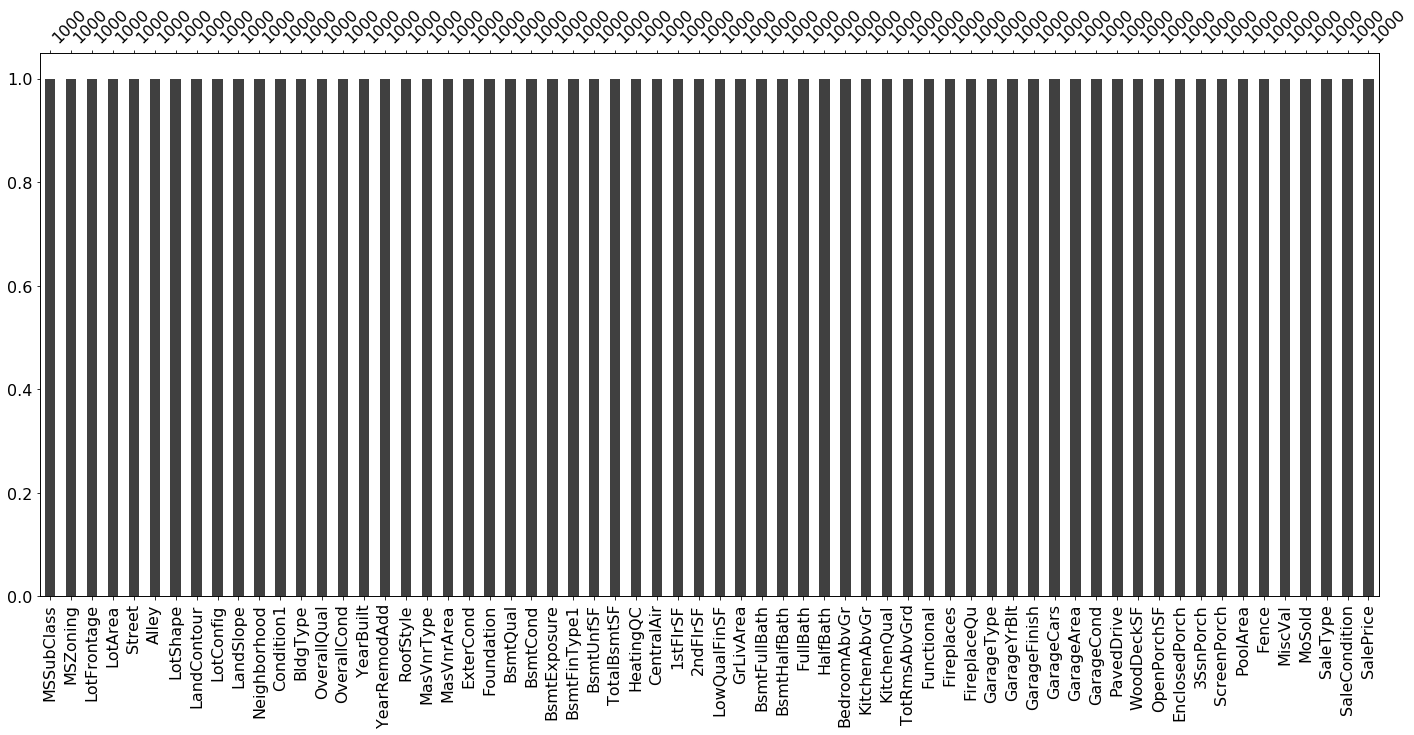

In [34]:
#checking to see if all missing values are filled
msno.bar(train_data.sample(1000))

In [35]:
#check to see if there is any missing values
train_data[show_missing()].isnull().sum()

Series([], dtype: float64)

After dropping variables and filling in all missing values for the features I no longer have missing data.

# Transforming String to Numeric

In [36]:
#figuring out how the data is formatted. 
train_data.dtypes.head()

MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
Street          object
dtype: object

In [37]:
#pulling up all "object" variables
obj_df = train_data.select_dtypes(include=['object']).copy()
obj_df.head()

,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,Gd,Typ,none,Attchd,RFn,TA,Y,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,...,TA,Typ,TA,Attchd,RFn,TA,Y,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,Gd,Typ,TA,Attchd,RFn,TA,Y,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,...,Gd,Typ,Gd,Detchd,Unf,TA,Y,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,...,Gd,Typ,TA,Attchd,RFn,TA,Y,None,WD,Normal


The easiest way and probably the most effective would be to make dummy variables for all categorical features.

In [38]:
#getting dummy variables to turn all object observations into numeric
train_data = pd.get_dummies(train_data)

In [39]:
train_data.shape

(1458, 206)

# Modeling

In [40]:
#create the target variable
target = train_data.SalePrice

In [41]:
#Dropping SalePrice
train_data.drop(['SalePrice'], axis=1, inplace=True)

In [42]:
#download appropriate packages to create a linear regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

In [43]:
#scale the data
scaler = StandardScaler()
scaler.fit(train_data)
scaled_data = scaler.transform(train_data)

In [44]:
#splitting the training dataset into a test and train
X_train, X_test, y_train, y_test = train_test_split(scaled_data, target, test_size=.2)

In [45]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
linear_regression_model.fit(X_train, y_train)
train_predictions = linear_regression_model.predict(X_train)
test_predictions = linear_regression_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 473813987.51508147
Test MSE: 707553721.0497723


The fact that the Train and Test MSE are so different ensures that the model is neither overfit nor biased.

In [46]:
#look at the coefficients 
linear_regression_model.fit(scaled_data, target)
sorted(list(zip(train_data.columns, linear_regression_model.coef_)), key=lambda x: abs(x[1]))

[('GarageCond_Gd', -0.43903079448197641),
 ('GarageYrBlt', 6.2242018077199681),
 ('Condition1_RRAn', 8.2166844456244128),
 ('Neighborhood_CollgCr', 12.929456116834604),
 ('Alley_None', -14.22477042809715),
 ('LandContour_Bnk', 15.432085128095801),
 ('BsmtFinType1_BLQ', -25.910517553397849),
 ('SaleType_Con', 45.331395300244836),
 ('CentralAir_N', -48.278927403284555),
 ('CentralAir_Y', 48.278927403332851),
 ('ExterCond_Fa', 66.248044179114572),
 ('BsmtExposure_Av', -67.556941923639968),
 ('BsmtExposure_None', 83.118277245589624),
 ('Fence_None', 95.753644768516878),
 ('Fence_MnWw', -108.69895284780276),
 ('SaleType_Oth', 123.09555547321018),
 ('SaleCondition_AdjLand', 130.3999411121236),
 ('FireplaceQu_Ex', -141.78349505214359),
 ('SaleType_ConLD', 148.8938426493819),
 ('KitchenQual_Fa', 149.52590120527421),
 ('SaleCondition_Normal', 168.10805141930334),
 ('MoSold', -170.23030358202146),
 ('LotShape_IR1', 172.6963168566258),
 ('Condition1_RRNe', 189.98138319895165),
 ('SaleCondition_Al

In [47]:
#look at the size of the target variable
target.shape

(1458,)

In [105]:
#Lets try a different model ElasticNetCV
from sklearn.linear_model import ElasticNetCV

clf = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[.1, 1, 10, 100])
clf.fit(X_train, y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_test, test_predictions)))

/Users/connerleavitt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Train MSE: 532035440.8751618
Test MSE: 442303919.0306618


This model has a much tighter MSE. Which is a major improvement from the Linear Regression Model.

Another Model is K-nearest neighbors

In [94]:
#import appropriate packages
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

In [97]:
reg = KNeighborsRegressor()
gridsearch = GridSearchCV(reg, {"n_neighbors": [1, 3, 5, 7, 9, 11]})
gridsearch.fit(X_train, y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_test, test_predictions)))

Train MSE: 532035440.8751618
Test MSE: 442303919.0306618


Overall I would not trust my models. They are either under predicting or over predicting around the true SalePrice. My models function and make predictions however, these predictions are not accurate.

# Applying all cleaning/modeling on the Test Data Set

In [49]:
test_data = pd.read_csv("https://storage.googleapis.com/kaggle-competitions-data/kaggle/5407/test.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1519510057&Signature=sj7Z%2Fs4%2Fw34JqRfnX%2BTiuKFHwA0Zd2TP%2FcxyiG7989qKhwIB8FGbU5Z4pvtkO2q7vch4DM2PQobI6%2FfwYi%2BXLzYOjQ5eM5lQQ%2BF3EVsaDs8ItVzUqRU7aozlhRWurBugxKggBLm3nCBfB8kR3A92iaGnIYwqrkU7SjjDyr%2FTELCwLA5eTaA%2FSBp0q%2B7awCbh8XtE8UYEiQR7T85iN4BSJUqpqm%2FlaqCbm0OsbSO2HzVPSKPCTFNrt7r4DaQBJEgo4FVkZ3ez7qgwHhEYXTbPpWJ3w5EXFQZ3JODGv80olAlJxSKUP86AoDYbIrKgVqqC585V9Nlt3FR85tN4eabfyw%3D%3D")

In [50]:
#Save Test IDs then drop the column
test_ids = test_data["Id"]
test_data.drop('Id', axis=1, inplace=True)

# Here I copy what I did in my training set to my testing test

I will create another header to show where I stop making the same transformations. I did not comment out this code or make comments because I did so in the training part of the assignment.

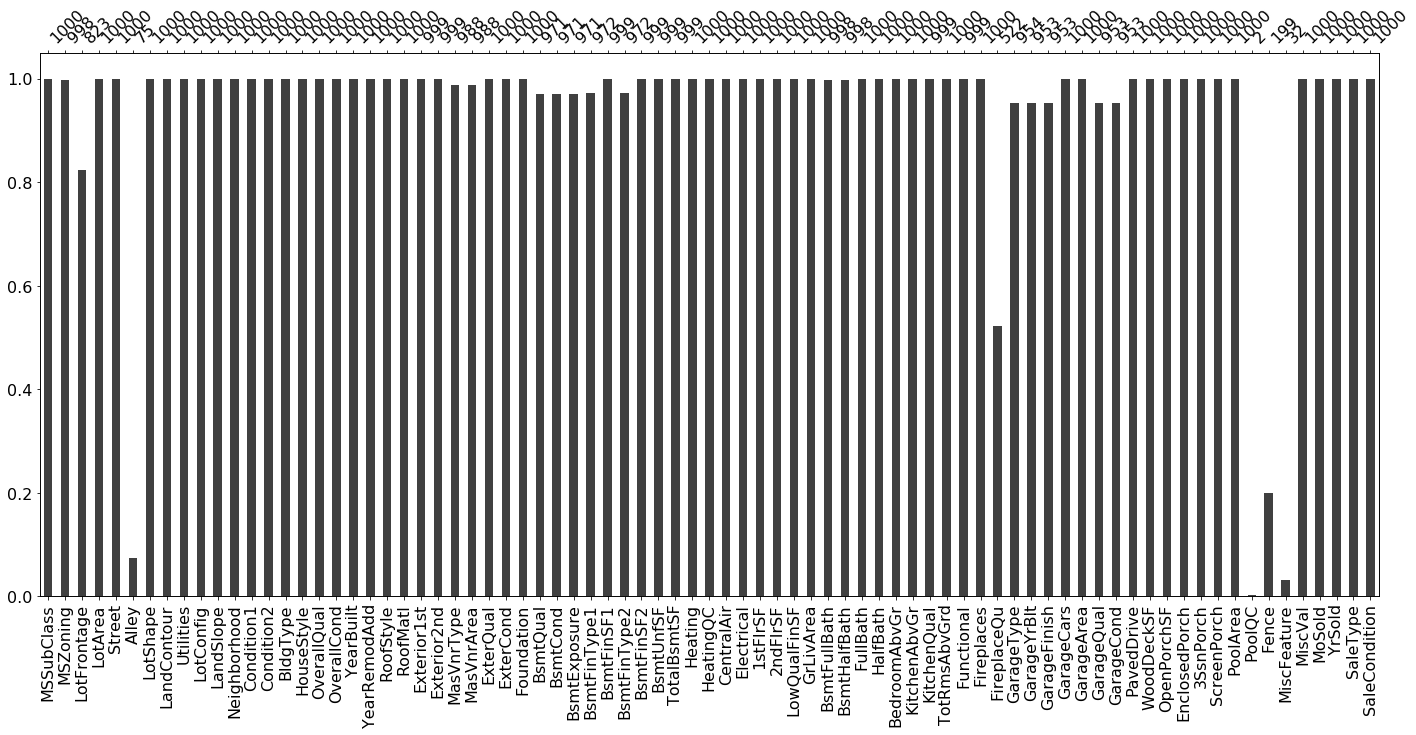

In [51]:
msno.bar(test_data.sample(1000))

In [52]:
def show_missing():
    missing = test_data.columns[test_data.isnull().any()].tolist()
    return missing
test_data[show_missing()].isnull().sum()

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [53]:
#I will drop PoolQC  because 1453 observations are missing out of 1460
test_data.drop(['PoolQC'], axis=1, inplace=True)
#I will drop MiscFeatures for the same reason as PoolQC
test_data.drop(['MiscFeature'], axis=1, inplace=True)
#I will drop YrSold because the year sold won't effect SalePrice
test_data.drop(['YrSold'], axis=1, inplace=True)
#I will drop Utilities because all observations are same minus two observations
test_data.drop(['Utilities'], axis=1, inplace=True)
#there are also variables within the set that seem redundant, these features will be dropped as well
test_data.drop(['ExterQual', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtFinSF1', 'GarageQual', 'Condition2', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Heating', 'HouseStyle', 'RoofMatl'], axis=1, inplace=True)

In [54]:
#Function to find value counts
def cat_exploration(column):
    return test_data[column].value_counts()

#function to fill in for NaN values
def cat_imputation(column, value):
    test_data.loc[test_data[column].isnull(),column] = value

In [55]:
#fill in missing values in LotFrontage with the mean
test_data = test_data.fillna({"LotFrontage": 70})

In [56]:
#NaN means no alley so I will fill with "none"
cat_imputation('Alley','None')

In [57]:
#NaN in MasVnrType means no and NaN in MasVnrArea means 0
cat_imputation('MasVnrType', 'None')
cat_imputation('MasVnrArea', 0.0)

In [58]:
#NaN in these variables mean there is no basement
for col in ('BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType1'):
    test_data[col] = test_data[col].fillna('None')

In [59]:
#NaN in FireplaceQu means no fireplace
cat_imputation('FireplaceQu', 'none')

In [60]:
for cols in garage_cols:
    if test_data[cols].dtype==np.object:
        cat_imputation(cols,'None')
    else:
        cat_imputation(cols, 0)

In [61]:
#in the data description NaN in Fence means no Fence
cat_imputation('Fence', 'None')

In [62]:
#check to see if there is any missing values
test_data[show_missing()].isnull().sum()

MSZoning        4
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
SaleType        1
dtype: int64

In [63]:
cat_exploration('MSZoning')

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [64]:
cat_imputation('MSZoning', 'RL')

In [65]:
cat_exploration('BsmtUnfSF')

0.0       123
384.0      11
624.0       8
480.0       7
100.0       7
672.0       7
348.0       7
738.0       7
120.0       6
216.0       6
784.0       6
294.0       6
816.0       6
322.0       5
728.0       5
546.0       5
525.0       5
585.0       5
226.0       5
228.0       5
30.0        5
832.0       5
240.0       5
150.0       5
768.0       5
186.0       5
600.0       5
396.0       5
456.0       5
306.0       5
         ... 
1270.0      1
129.0       1
390.0       1
161.0       1
1105.0      1
1214.0      1
470.0       1
290.0       1
747.0       1
613.0       1
615.0       1
1146.0      1
1694.0      1
809.0       1
577.0       1
1721.0      1
2140.0      1
1090.0      1
1254.0      1
354.0       1
671.0       1
1043.0      1
1153.0      1
1335.0      1
1324.0      1
406.0       1
1604.0      1
1369.0      1
549.0       1
1211.0      1
Name: BsmtUnfSF, Length: 793, dtype: int64

In [66]:
train_data["BsmtUnfSF"].mean()

567.09670781893

In [67]:
cat_imputation('BsmtUnfSF', 567.09)

In [68]:
train_data['TotalBsmtSF'].mean()

1052.537037037037

In [69]:
cat_imputation('TotalBsmtSF', 1052.54)

In [70]:
cat_exploration('BsmtFullBath')

0.0    849
1.0    584
2.0     23
3.0      1
Name: BsmtFullBath, dtype: int64

In [71]:
cat_imputation('BsmtFullBath', 0.0)

In [72]:
cat_exploration('BsmtHalfBath')

0.0    1364
1.0      91
2.0       2
Name: BsmtHalfBath, dtype: int64

In [73]:
cat_imputation('BsmtHalfBath', 0.0)

In [74]:
cat_exploration('KitchenQual')

TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [75]:
cat_imputation('KitchenQual', 'TA')

In [76]:
cat_exploration('Functional')

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [77]:
cat_imputation('Functional', 'Typ')

In [78]:
cat_exploration('SaleType')

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: SaleType, dtype: int64

In [79]:
cat_imputation('SaleType', 'WD')

In [80]:
test_data[show_missing()].isnull().sum()

Series([], dtype: float64)

In [81]:
#getting dummy variables to turn all object observations into numeric
test_data = pd.get_dummies(test_data)

In [82]:
test_data.shape

(1459, 205)

In [83]:
set(train_data.columns).difference(set(test_data.columns))

set()

# Finished with copying the transformations

Now we are ready to run my model agaisnt the test data.

In [87]:
test_predictions = clf.predict(test_data)

In [88]:
price_pred = test_predictions

In [106]:
#To see what my predictions are
print(price_pred)

[  8.76224176e+07   1.00437975e+08   1.09900766e+08 ...,   1.35148426e+08
   7.99996079e+07   9.87486537e+07]


In [107]:
#downloading into a CSV
my_submission = pd.DataFrame({'Id': test_ids, 'SalePrice': price_pred})

my_submission.to_csv('submission.csv3', index=False)